## **Real estate price prediction:** 

## **Dataset's Content**

**X1 transaction date** - transaction date.

**X2 house age** - house age.

**X3 distance to the nearest MRT station** - distance to the nearest MRT station.

**X4 number of convenience stores** - # of convenience stores.

**X5 latitude** - latitude.

**X6 longitude** - longitude.

**Y house price of unit area** - house price of unit area.



Importing Libraries

In [276]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading Dataset

In [277]:
data = pd.read_csv(r"d:\My Data\data sets\Real estate price prediction\Real estate.csv",index_col="No")
data


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6


In [278]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 414 entries, 1 to 414
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 25.9 KB


Data cleaning

In [279]:
# Checking for null values

data.isnull().sum()

X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [280]:
# Checking for duplicated values

data.duplicated().sum()

np.int64(0)

In [281]:
data.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [282]:
data.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


# **Regression**

Feature Engineering

In [283]:
data.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


Feature Selection

In [284]:
data.corr()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
X1 transaction date,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


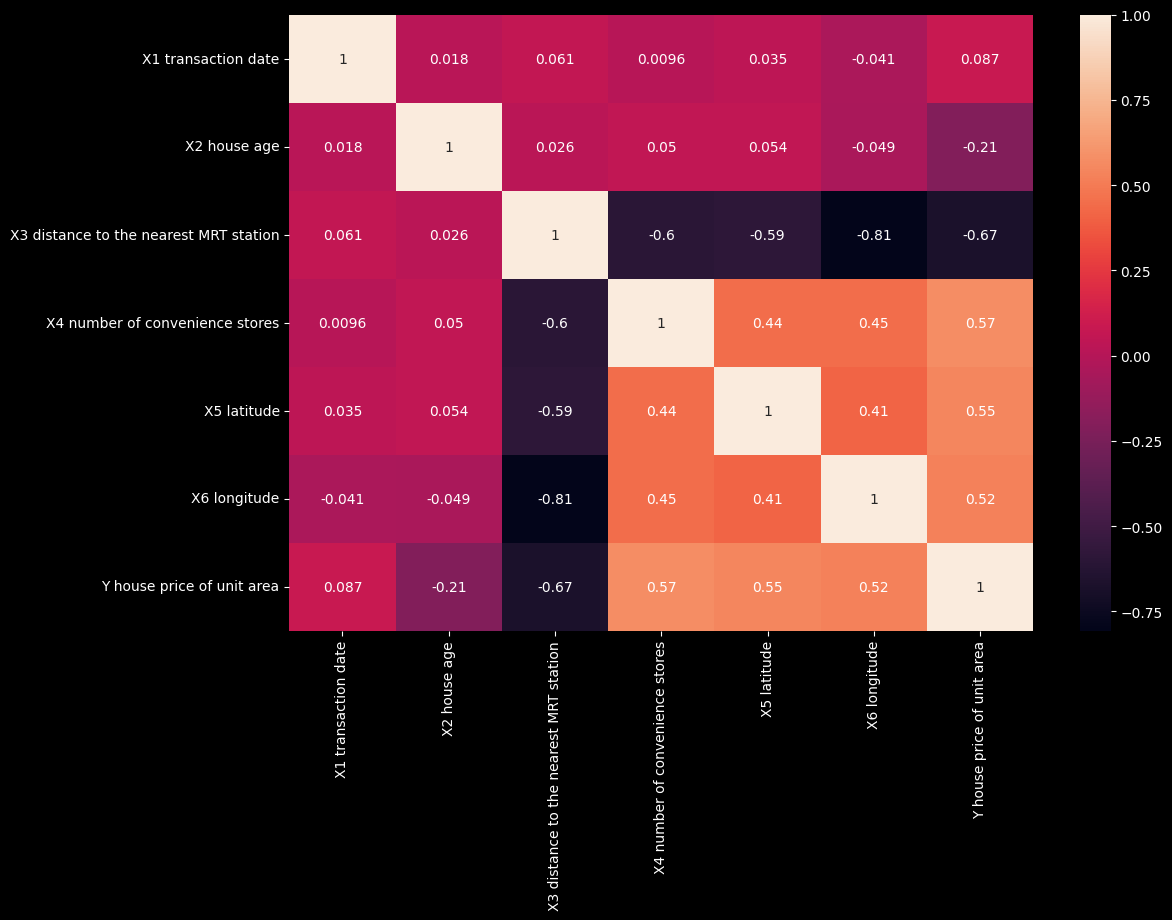

In [285]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [286]:
cor=data.corr()['Y house price of unit area']
cols_to_drop=cor[(cor>-0.15)&(cor<0.15)].index
data=data.drop(cols_to_drop,axis=1)

In [287]:
data.corr()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
X2 house age,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


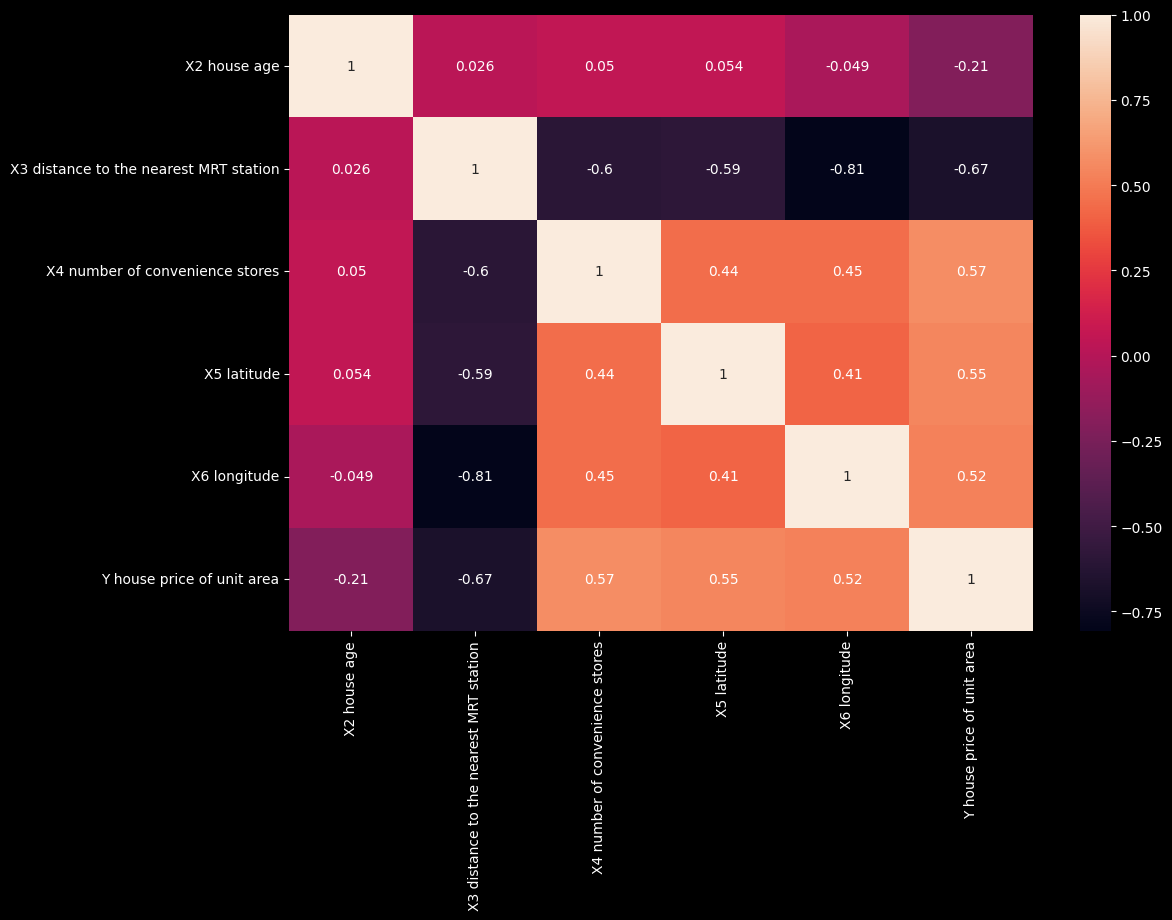

In [288]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True)
plt.show()

Train - test   split

In [289]:
from sklearn.model_selection import train_test_split

X=data.drop(["Y house price of unit area"],axis=1)

Y=data["Y house price of unit area"]

X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2, random_state=42)

In [290]:
# Scale all features using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


Linear regression

In [291]:
# Use LinearRegression
from sklearn.linear_model import LinearRegression
l = LinearRegression()
l.fit(X_train,Y_train)
y_test_pred_line = l.predict(X_test)

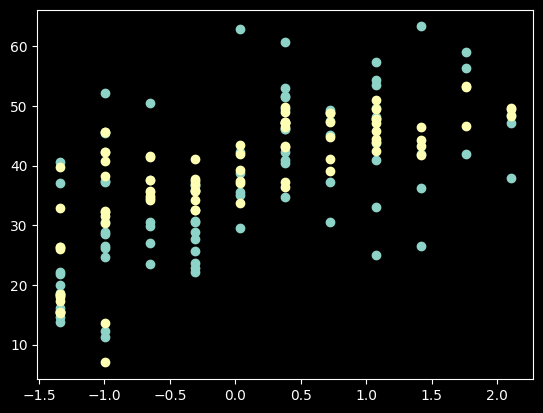

In [292]:
plt.scatter(pd.DataFrame(X_test)[2],Y_test)
plt.scatter(pd.DataFrame(X_test)[2],y_test_pred_line)
plt.show()

In [293]:
from sklearn.metrics import r2_score

r2 = r2_score(Y_test, y_test_pred_line)
print("Accuracy:", r2)


Accuracy: 0.6496385877630104


Polynomial regression

In [294]:
from sklearn.preprocessing import PolynomialFeatures
p = PolynomialFeatures(degree=2)
X_train = p.fit_transform(X_train)
X_test = p.fit_transform(X_test)
l0 = LinearRegression()
l0.fit(X_train,Y_train)
y_test_pred_poly = l0.predict(X_test)

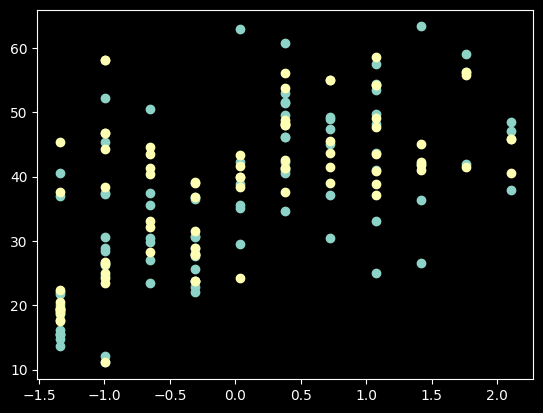

In [295]:
plt.scatter(pd.DataFrame(X_test)[3],Y_test)
plt.scatter(pd.DataFrame(X_test)[3],y_test_pred_poly)
plt.show()

In [296]:
r2 = r2_score(Y_test, y_test_pred_poly)
print("Accuracy:", r2)



Accuracy: 0.726229641239502
